EDA Report: Employee Attrition & Dissatisfaction Analysis

1. Introduction

1.1 Background:
Employee attrition remains a critical concern for organizations aiming to retain top talent, reduce hiring costs, and maintain organizational knowledge. While a certain degree of turnover is natural, high attrition rates can signal deeper issues related to employee satisfaction, compensation, growth opportunities, and work-life balance.

1.2 Data Overview
The data presented in this report originates from a structured HR dataset containing demographic, professional, and satisfaction-related information for 1,470 employees. The goal is to uncover the key factors contributing to employee dissatisfaction and eventual attrition.

Dataset: 
    HR-Employee-Attrition.csv

Variables: 
    35 columns, including demographics, job-related metrics, and satisfaction scores.

Key Satisfaction Metrics:
    Environment Satisfaction (1–4)
    Job Satisfaction (1–4)
    Relationship Satisfaction (1–4)
    Work Life Balance (1–4)


2. Key Findings

2.1 Satisfaction Distributions

    Environment Satisfaction:
        24% of employees rated it 1 (lowest), 28% rated 2, 26% rated 3, and 22% rated 4.

    Job Satisfaction:
        21% rated 1, 26% rated 2, 29% rated 3, and 24% rated 4.

    Work-Life Balance:
        18% rated 1, 33% rated 2, 30% rated 3, and 19% rated 4.

2.2 Correlation with Satisfaction

    Negative Correlations:
        Income/salary
        Years SinceLast Promotion
        OverTime

    Positive Correlations:
        Monthly Income (Top Level)
        Stock Option Level 

3. Objective

This report uses Exploratory Data Analysis (EDA) techniques in Python to examine patterns in employee behavior and experience. The primary objectives are:

    To identify factors linked to employee dissatisfaction
    To understand the drivers of voluntary attrition
    To provide data-driven recommendations for improving retention

for more information on the topic of Attrition, this article can be useful:
https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sm
import pandas as pd
import plotly.express as px

Step 1: Data Loading and Structure

In [3]:

df = pd.read_csv("/Users/alisafwat/Desktop/HR-Employee-Attrition.csv")
df.head()
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Insight from step 1: The dataset contains 1,470 employees and 35 columns covering demographics, job roles, income, satisfaction scores, and attrition.




Step 2: Data Cleaning & Structure

In [4]:
# Count and locate missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter only columns with missing values

# Display results
print("Missing Value Summary:")
print(missing_values if not missing_values.empty else "No missing values found in the dataset.")


Missing Value Summary:
No missing values found in the dataset.


Insight of step 2:
    - No missing values 
    - Data types are clean and well-separated into numerical (e.g. age, income) and categorical (e.g.  gender, job role).


    

Step 3: Attrition Overview

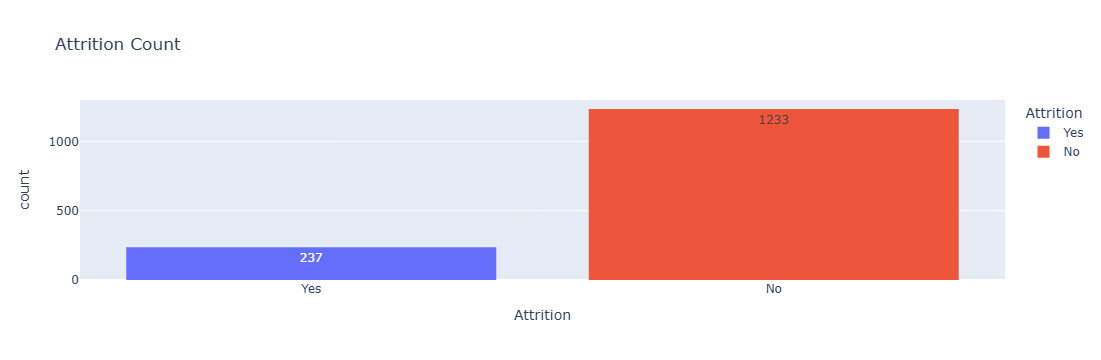

In [5]:

fig = px.histogram(df, x="Attrition", color="Attrition", title="Attrition Count", text_auto=True)
fig.show()

Insight of step 3:
Nearly 16% of employees have left the company. We’ll focus on understanding this segment.




Step 4: Satisfaction Levels Analysis

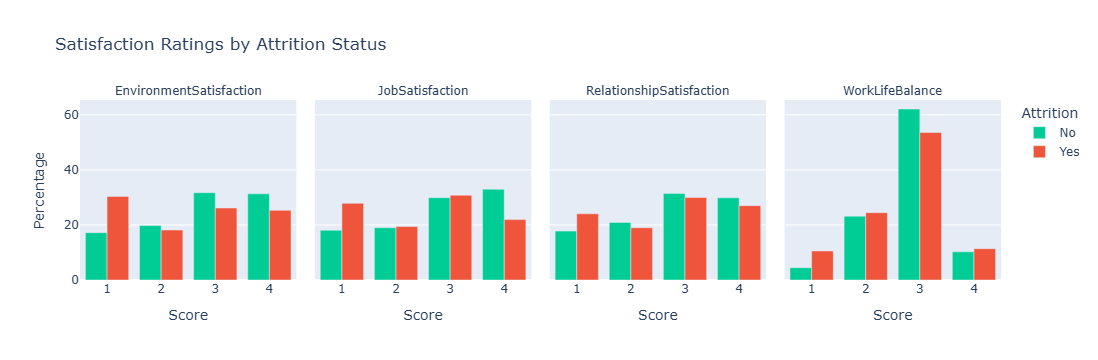

In [6]:

# Select relevant satisfaction columns
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

# Melt data for long-form plotting
df_melted = df.melt(id_vars='Attrition', value_vars=satisfaction_cols,
                    var_name='Satisfaction Type', value_name='Score')

# Calculate percentage distribution
grouped = (
    df_melted.groupby(['Satisfaction Type', 'Score', 'Attrition'])
    .size()
    .reset_index(name='Count')
)

# Normalize counts to percentages per satisfaction type & attrition
grouped['Percentage'] = grouped.groupby(['Satisfaction Type', 'Attrition'])['Count'].transform(lambda x: 100 * x / x.sum())

# Create grouped bar chart
fig = px.bar(
    grouped,
    x='Score',
    y='Percentage',
    color='Attrition',
    barmode='group',
    facet_col='Satisfaction Type',
    category_orders={"Score": [1, 2, 3, 4]},
    color_discrete_map={"Yes": "#EF553B", "No": "#00CC96"},
    title="Satisfaction Ratings by Attrition Status"
)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()


Insight of step 4:
Employees who left have notably lower satisfaction scores across all categories — especially Job Satisfaction and Work-Life Balance.




Step 5: Overtime & Burnout Factor

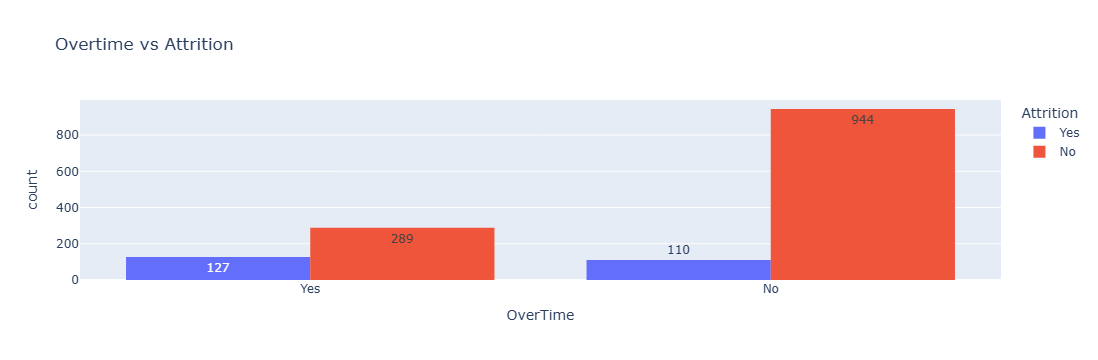

In [7]:
fig = px.histogram(df, x="OverTime", color="Attrition", barmode="group",
                   title="Overtime vs Attrition", text_auto=True)
fig.show()

Insight of step 5:
Employees working overtime are much more likely to leave, suggesting overtime is a major burnout trigger.




Step 6: Monthly Income & Attrition

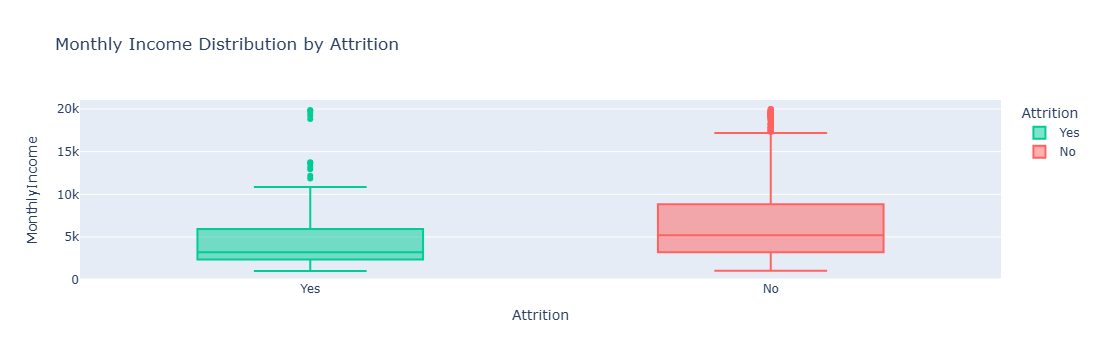

In [8]:
fig = px.box(df, x="Attrition", y="MonthlyIncome", color="Attrition",
             title="Monthly Income Distribution by Attrition",
             color_discrete_sequence=['#00cc96', '#ff6361'])
fig.show()

Insight of step 6:
Leavers tend to have lower incomes so that compensation dissatisfaction could be a key driver.




Step 7: Job Role Breakdown Vs Attrition

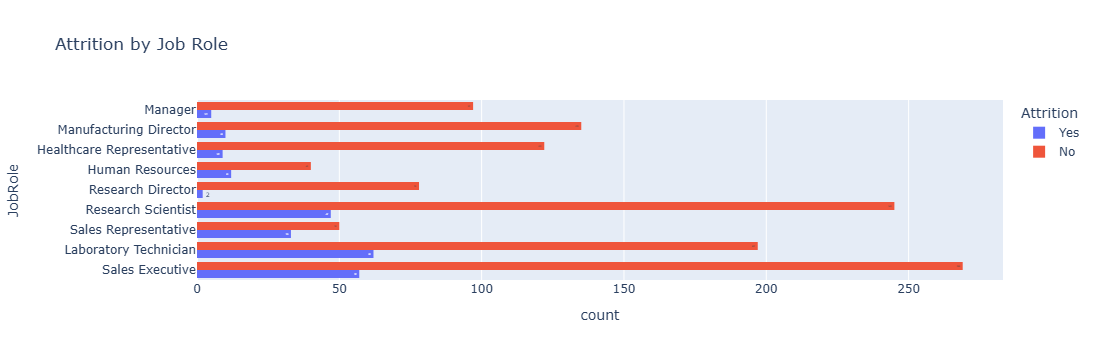

In [9]:
fig = px.histogram(df, y="JobRole", color="Attrition", barmode="group",
                   title="Attrition by Job Role", text_auto=True)
fig.show()


Insight of step 7:
Roles like Sales Representative, Sales Excutive, Research Scientist and Laboratory Technician show higher attrition — further analysis may be needed on pay, workload, or stress.





Step 8: Promotion History Impact


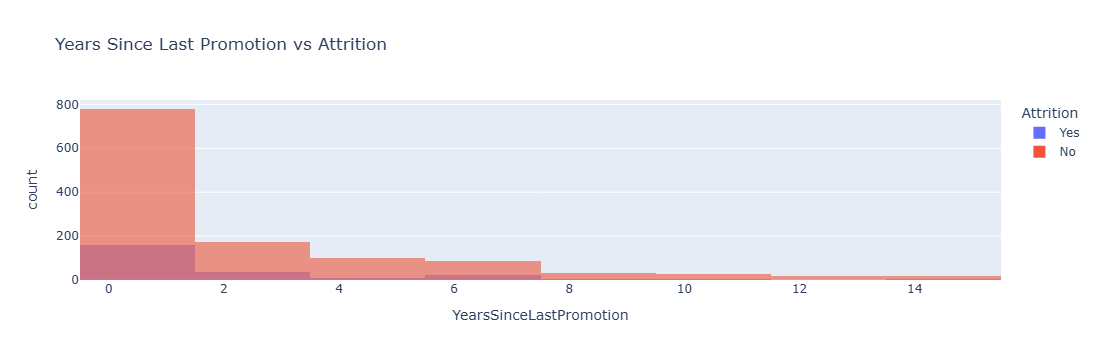

In [10]:
fig = px.histogram(df, x="YearsSinceLastPromotion", color="Attrition",
                   barmode="overlay", opacity=0.6,
                   title="Years Since Last Promotion vs Attrition",
                   nbins=10)
fig.show()


Insight of step 8:
A large portion of employees who left had not received promotions in over 4 years. Career stagnation clearly contributes to dissatisfaction.




Step 9: Combined Analysis — Promotion + Satisfaction

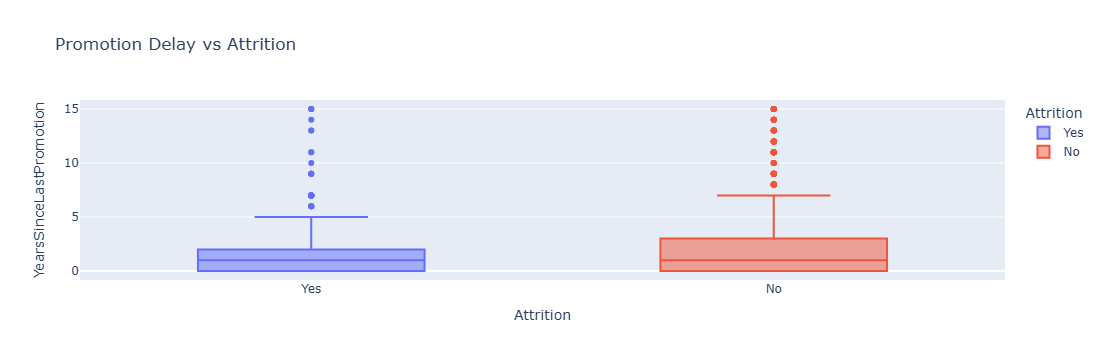

In [11]:
fig = px.box(df, x="Attrition", y="YearsSinceLastPromotion", color="Attrition",
             title="Promotion Delay vs Attrition",
             color_discrete_sequence=['#636efa', '#ef553b'])
fig.show()


Insight of step 9:
Employees who stayed were promoted more recently. Delayed promotions appear tied to higher risk of leaving.




Conclusion

The analysis reveals that employee attrition is strongly influenced by a combination of dissatisfaction, lack of career progression, and work-life imbalance. While the most at-risk employees report low satisfaction scores (1–2), a surprisingly large portion of those who left rated their experience as neutral (score 3) — indicating a silent disengagement pattern.

Key factors contributing to attrition:
    Low Job, Environment, and Relationship Satisfaction
    Long periods without promotion
    Overtime work pressure
    Lower monthly income
    Certain job roles (e.g. Sales, Lab Tech) showed higher attrition trends


Even employees who were not visibly unhappy (score = 3) were prone to leaving, suggesting that moderate satisfaction without engagement is a hidden risk.

Recommendations

1. Target Moderate Satisfaction Employees (Score 3)
    Don't wait for dissatisfaction to become severe.
    Implement stay interviews or short feedback loops to understand and address "meh" experiences.

2. Reinforce Career Growth & Promotion Paths
    Identify employees with 3+ years since last promotion and create tailored development plans.
    Highlight clear, visible promotion criteria.

3. Address Work-Life Balance & Overtime
    Audit departments with high overtime.
    Offer flexible work arrangements, shift balancing, or compensatory time-off.

4. Evaluate Compensation Fairness
    Use benchmarking to assess whether low-income roles are underpaid.
    Consider adjusting pay for high-risk roles.

5. Monitor High-Risk Job Roles
    Conduct deeper reviews into roles with high attrition (e.g. Sales Reps).
    Explore role-specific satisfaction or workload challenges.

